### 이미지 복원

In [1]:
#노이즈가 포함된 이미지를 복원

import torch
import pickle

shp_original_img = (100, 100)
broken_image =  torch.FloatTensor( pickle.load(open('c:/workspace3/data/broken_image_t.p', 'rb'),encoding='latin1' ) )

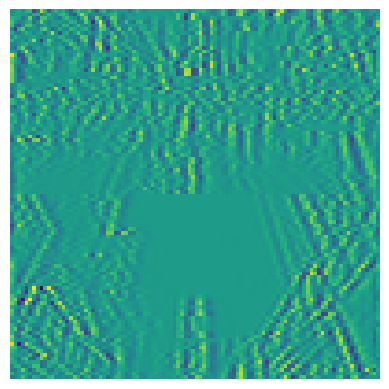

In [2]:
import matplotlib.pyplot as plt
import os    

os.environ['KMP_DUPLICATE_LIB_OK']='True'

#오염된 이미지
plt.imshow(broken_image.view(100,100))
plt.axis('off')

plt.show()

In [3]:
#이미지에 노이즈를 추가하는 함수

def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])

    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])

        h_l = torch.cat( (zero_tensor, h[:-1]), 0) #텐서 연결
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r

        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )

    return h

In [4]:
#손실 계산 함수

def distance_loss(hypothesis, broken_image):    

    return torch.dist(hypothesis, broken_image)

In [8]:
#랜덤 이미지 텐서

random_tensor = torch.randn(10000, dtype = torch.float)
random_tensor

tensor([-0.6794, -0.2211,  0.8480,  ...,  1.3964,  1.0779, -1.0547])

In [9]:
lr = 0.8

for i in range(0,20000):

    #자동 미분 기능 on
    random_tensor.requires_grad_(True)

    #이미지에 노이즈 추가
    hypothesis = weird_function(random_tensor)

    #오차 계산
    loss = distance_loss(hypothesis, broken_image)
#                           생성          원본
    loss.backward()

    #자동 미분 기능 off
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad

    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 12.139012336730957
Loss at 1000 = 1.1454769372940063
Loss at 2000 = 0.5552074313163757
Loss at 3000 = 0.38408002257347107
Loss at 4000 = 0.3031361401081085
Loss at 5000 = 0.25394317507743835
Loss at 6000 = 0.21897657215595245
Loss at 7000 = 0.1914064735174179
Loss at 8000 = 0.16812238097190857
Loss at 9000 = 0.14753927290439606
Loss at 10000 = 0.12876427173614502
Loss at 11000 = 0.11125314980745316
Loss at 12000 = 0.09465552866458893
Loss at 13000 = 0.07873772084712982
Loss at 14000 = 0.06334023922681808
Loss at 15000 = 0.048352960497140884
Loss at 16000 = 0.03370038419961929
Loss at 17000 = 0.02104813978075981
Loss at 18000 = 0.021163716912269592
Loss at 19000 = 0.021166885271668434


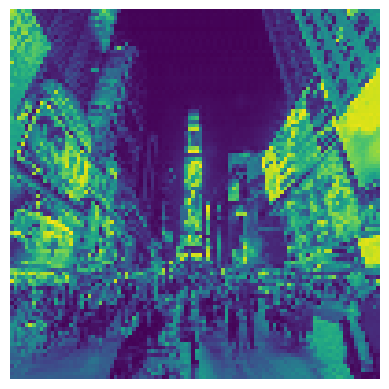

In [10]:
#복원된 이미지

plt.imshow(random_tensor.view(100,100).data)
plt.axis('off')

plt.show()